UTFSM <br>
[ICS294]: Econometría <br>
02-2023  

---
## Actividad Semanal N°1
---
Diego Bernal Soto: diego.bernals@usm.cl
---


<h2>Pregunta N°1</h2>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import  skew, kurtosis, gaussian_kde

In [64]:
np.random.seed(707)
vec_norm = np.round(np.random.normal(loc=22, scale=4, size=100), 2)
datos = pd.DataFrame({'datos_norm': vec_norm}) 
datos.head()

,datos_norm
0,20.20
1,16.64
2,23.56
3,17.89
4,17.08


## Pregunta N°2

In [65]:
def bins_op(datos):
    Q1 = np.quantile(datos, 0.25)
    Q3 = np.quantile(datos, 0.75)
    IQR = Q3 - Q1
    h = 2 * IQR * len(datos)**(-1/3)
    bins = int((datos.max() - datos.min()) / h)
    return bins


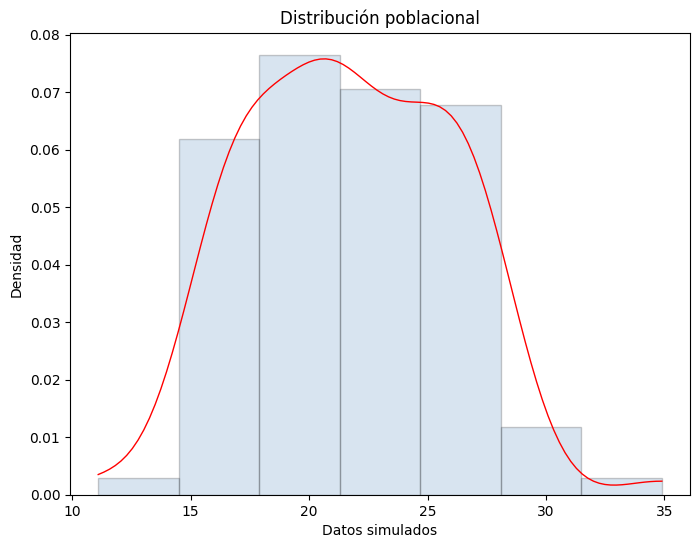

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.hist(datos['datos_norm'], bins=bins_op(datos['datos_norm']), density=True, color='#3c78b4', edgecolor='black', alpha=0.2)
ax.set_xlabel('Datos simulados')
ax.set_ylabel('Densidad')
ax.set_title('Distribución poblacional')

density = gaussian_kde(datos['datos_norm'])
x = np.linspace(datos['datos_norm'].min(), datos['datos_norm'].max(), 100)
y = density(x)
ax.plot(x, y, color='red', linewidth=1)

plt.show()

In [67]:
print(round(skew(datos['datos_norm']), 1))
print(round(kurtosis(datos['datos_norm']), 1))

0.1
-0.4


<h2>Pregunta N°3<h2>

In [76]:
np.random.seed(707)
N = datos.shape[0]
n = 20
units = np.random.choice(N, size=n, replace=False)
mysample = datos.iloc[units]
print(mysample)

    datos_norm
92       17.17
0        20.20
76       16.80
24       17.11
30       21.56
85       21.33
50       28.88
64       18.48
70       22.93
19       25.53
25       15.22
48       24.24
89       25.08
46       34.89
72       18.86
66       16.45
18       23.59
90       17.95
35       26.22
5        19.73


In [69]:
n_samples = 100
ms = np.zeros(n_samples)
ds_ms = np.zeros(n_samples)

np.random.seed(707)

for i in range(n_samples):
    units = np.random.choice(N, size=n, replace=False)
    ms[i] = round(np.mean(datos['datos_norm'][units]), 2)
    ds_ms[i] = round(np.std(datos['datos_norm'][units], ddof=1) / np.sqrt(n), 2)

ms_df = pd.DataFrame({'ms': ms, 'ds': ds_ms})
ms_df.head()

,ms,ds
0,21.61,1.10
1,21.56,1.20
2,22.18,0.89
3,23.51,0.96
4,22.02,0.86


In [70]:
h_med = round(2 * 3**(1/3) * (3.14)**(1/6) * np.std(ms_df['ms']) * len(ms_df)**(-1/3), 2)
h_sd = round(2 * 3**(1/3) * (3.14)**(1/6) * np.std(ms_df['ds']) * len(ms_df)**(-1/3), 2)
print("La amplitud del histograma para la media es:", h_med)
print("La amplitud del histograma para el error estándar es:", h_sd)

La amplitud del histograma para la media es: 0.65
La amplitud del histograma para el error estándar es: 0.1


<h2>Pregunta N°4</h2>

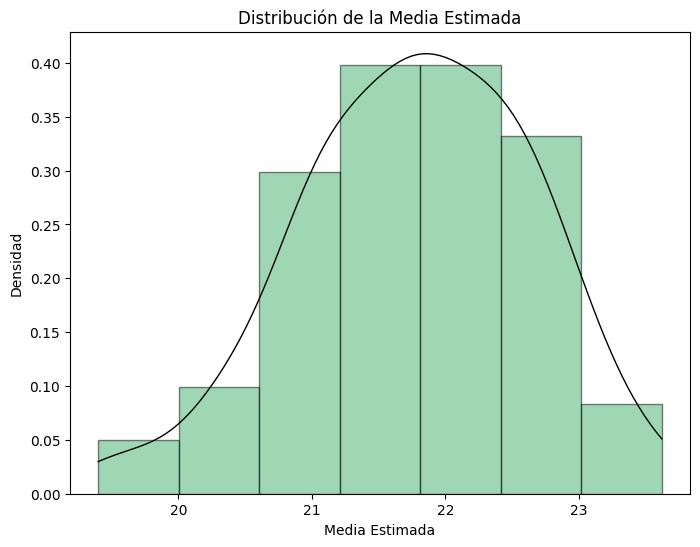

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.hist(ms_df['ms'], bins=bins_op(ms_df['ms']), density=True, color='#40b16d', edgecolor='black', alpha=0.5)
ax.set_xlabel('Media Estimada')
ax.set_ylabel('Densidad')
ax.set_title('Distribución de la Media Estimada')


density = gaussian_kde(ms_df['ms'])
x = np.linspace(ms_df['ms'].min(), ms_df['ms'].max(), 100)
y = density(x)
ax.plot(x, y, color='black', linewidth=1)

plt.show()

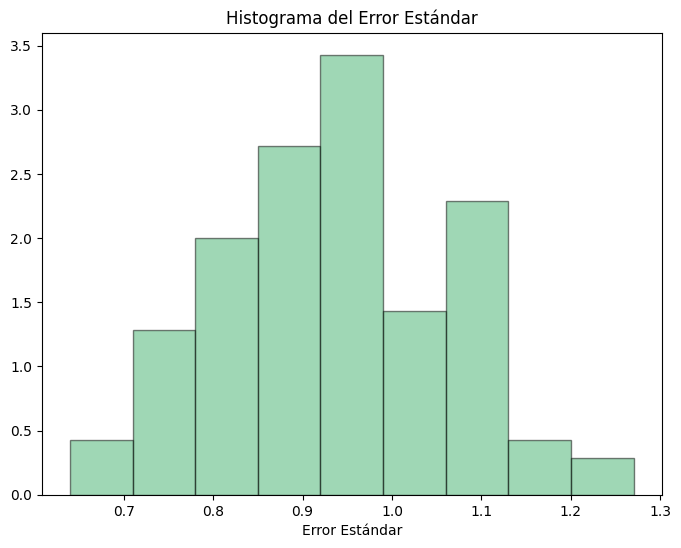

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.hist(ms_df['ds'], bins=bins_op(ms_df['ds']), density=True, color='#40b16d', edgecolor='black', alpha=0.5)
ax.set_xlabel('Error Estándar')
ax.set_title('Histograma del Error Estándar')

plt.show()